In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
os.chdir('./drive/My Drive/signature_data')

In [4]:
!ls

test_data  train_data  validation_data


#Dataset

In [5]:
def get_data(dir, labels):
    features = []
    targets = []
    for name in tqdm(sorted(os.listdir(dir))):
        for image_name in sorted(os.listdir(dir+'/'+name)):
            img = cv2.imread(dir+'/'+name+'/'+image_name, cv2.IMREAD_GRAYSCALE)
            features.append(img)
            if labels:
                if 'forg' in name.lower():
                    targets.append(1)
                else:
                    targets.append(0)
    if labels:
        return np.array(features),np.array(targets)
    else:
        return np.array(features)

In [6]:
train_features, train_labels = get_data('train_data', True)
validation_features, validation_labels = get_data('validation_data', True)
test_features, test_labels = get_data('test_data', True)

100%|██████████| 128/128 [00:01<00:00, 83.20it/s]


In [7]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)

(826, 268, 650)
(413, 268, 650)
(410, 268, 650)


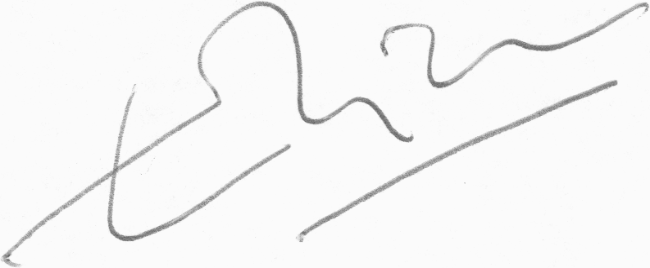

In [8]:
cv2_imshow(train_features[4])

In [9]:
train_features = train_features.reshape((826, 268, 650, 1))
train_features = train_features.astype('float32') / 255
validation_features = validation_features.reshape((413, 268, 650, 1))
validation_features = validation_features.astype('float32') / 255
test_features = test_features.reshape((410, 268, 650, 1))
test_features = test_features.astype('float32') / 255

#Creating the Model

In [10]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(268, 650, 1),padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#Training the model

In [11]:
history = model.fit(train_features, train_labels, epochs=20, batch_size=64, validation_data=(validation_features, validation_labels))

Epoch 1/20
13/13 [==============================] - 11s 539ms/step - loss: 3.6016 - accuracy: 0.5137 - val_loss: 0.6901 - val_accuracy: 0.5375
Epoch 2/20
13/13 [==============================] - 5s 359ms/step - loss: 0.7560 - accuracy: 0.5671 - val_loss: 0.7128 - val_accuracy: 0.4625
Epoch 3/20
13/13 [==============================] - 5s 364ms/step - loss: 0.6695 - accuracy: 0.5644 - val_loss: 0.7493 - val_accuracy: 0.5956
Epoch 4/20
13/13 [==============================] - 5s 363ms/step - loss: 0.4366 - accuracy: 0.8028 - val_loss: 0.3505 - val_accuracy: 0.8910
Epoch 5/20
13/13 [==============================] - 5s 363ms/step - loss: 0.2741 - accuracy: 0.8782 - val_loss: 0.5074 - val_accuracy: 0.8789
Epoch 6/20
13/13 [==============================] - 5s 367ms/step - loss: 0.1039 - accuracy: 0.9601 - val_loss: 0.7291 - val_accuracy: 0.8547
Epoch 7/20
13/13 [==============================] - 5s 366ms/step - loss: 0.1056 - accuracy: 0.9807 - val_loss: 1.0255 - val_accuracy: 0.4625
Epoch

#Plotting results

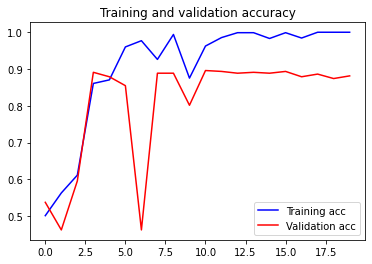

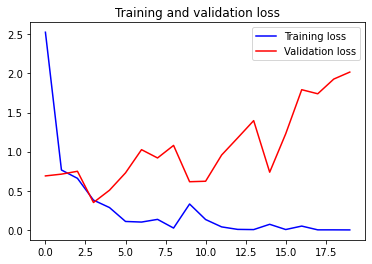

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#Checking accuracy of Test set

In [13]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
test_acc

13/13 [==============================] - 1s 76ms/step - loss: 2.2735 - accuracy: 0.8780


0.8780487775802612

#Saving the Model

In [14]:
model.save('signature_forgery.h5')

#Creating the Model with Regularization

In [15]:
from keras import layers
from keras import models
from keras.layers import Dropout
model_reg = models.Sequential()
model_reg.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(268, 650, 1)))
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Flatten())
model_reg.add(layers.Dense(64, activation='relu'))
model_reg.add(Dropout(0.7))
model_reg.add(layers.Dense(64, activation='relu'))
model_reg.add(Dropout(0.7))
model_reg.add(layers.Dense(1, activation='sigmoid'))
model_reg.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#Training the model with Regularization

In [16]:
history_reg = model_reg.fit(train_features, train_labels, epochs=18, batch_size=64, validation_data=(validation_features, validation_labels))

Epoch 1/18
13/13 [==============================] - 8s 475ms/step - loss: 1.7254 - accuracy: 0.4858 - val_loss: 0.6925 - val_accuracy: 0.5375
Epoch 2/18
13/13 [==============================] - 4s 328ms/step - loss: 0.6923 - accuracy: 0.5756 - val_loss: 0.6918 - val_accuracy: 0.5375
Epoch 3/18
13/13 [==============================] - 4s 326ms/step - loss: 0.7093 - accuracy: 0.5338 - val_loss: 0.6896 - val_accuracy: 0.5400
Epoch 4/18
13/13 [==============================] - 4s 330ms/step - loss: 0.7003 - accuracy: 0.5716 - val_loss: 0.6996 - val_accuracy: 0.4625
Epoch 5/18
13/13 [==============================] - 4s 328ms/step - loss: 0.7245 - accuracy: 0.5591 - val_loss: 0.6647 - val_accuracy: 0.8015
Epoch 6/18
13/13 [==============================] - 4s 331ms/step - loss: 0.6683 - accuracy: 0.6601 - val_loss: 0.5591 - val_accuracy: 0.8692
Epoch 7/18
13/13 [==============================] - 4s 328ms/step - loss: 0.5755 - accuracy: 0.8044 - val_loss: 0.5116 - val_accuracy: 0.8717
Epoch 

#Plotting results

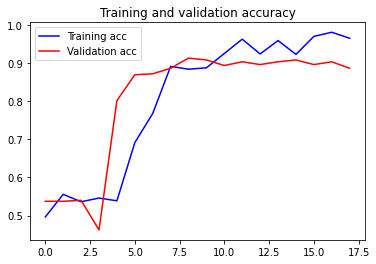

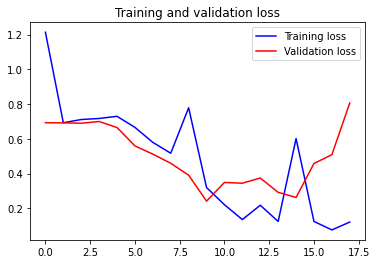

In [17]:
acc = history_reg.history['accuracy']
val_acc = history_reg.history['val_accuracy']
loss = history_reg.history['loss']
val_loss = history_reg.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#Checking accuracy of Test set

In [18]:
test_loss, test_acc = model_reg.evaluate(test_features, test_labels)
test_acc

13/13 [==============================] - 1s 72ms/step - loss: 0.8892 - accuracy: 0.8854


0.8853658437728882

#Saving the Model

In [19]:
model_reg.save('signature_forgery_reg.h5')